In [1]:
import random
#our group number is 10, hence we use 10 as the random seed
random_seed = 10
random.seed(random_seed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#### Read the dataset and show some basic information

In [2]:
bank = pd.read_csv('../data/bank-full.csv', sep=';')

In [3]:
#transfer y col to 0,1
le = LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])

In [4]:
bank.describe()
#describe() only works on numerical columns, so we need to convert the categorical columns to numerical columns

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [5]:
#define columns that need to be converted to numerical columns 
#there are 10 categorical columns, so we need to convert them to numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [6]:
#We use two methods to convert categorical columns to numerical columns: Label Encoding and One-Hot Encoding
#Different labeling methods have different effects on the model, so we need to try both methods
#copy the dataset
bank_label_encoded = bank.copy()
bank_ohe = bank.copy()

le = LabelEncoder()

#label Encoding
for col in categorical_cols:
    bank_label_encoded[col + '_label'] = le.fit_transform(bank_label_encoded[col])

#One-Hot Encoding
for col in categorical_cols:
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    encoded_cols = ohe.fit_transform(bank_ohe[[col]])
    df_encoded = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out([col]))
    bank_ohe = pd.concat([bank_ohe, df_encoded], axis=1).drop(columns=[col])
    


In [7]:
#only keep numerical columns
bank_label_encoded = bank_label_encoded.drop(columns=categorical_cols)
# move col y to the last
bank_label_encoded = bank_label_encoded[[c for c in bank_label_encoded if c not in ['y']] + ['y']]

#### split the dataset into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

#features and target
X_label = bank_label_encoded.drop(columns=['y'])
X_ohe = bank_ohe.drop(columns=['y'])
y = bank['y']

In [9]:
X_train_label, X_test_label, y_train, y_test = train_test_split(X_label, y, test_size=0.2, random_state=random_seed)
X_train_ohe, X_test_ohe, _, _ = train_test_split(X_ohe, y, test_size=0.2, random_state=random_seed)

In [10]:
bank_label_encoded

,age,balance,day,duration,campaign,pdays,previous,job_label,marital_label,education_label,default_label,housing_label,loan_label,contact_label,month_label,poutcome_label,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [11]:
#train the Random Forest classifier
rf_le = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_le.fit(X_train_label, y_train)

#get feature importances
importances = rf_le.feature_importances_

#sort feature importances in descending order
indices = np.argsort(importances)[::-1]

#select the top five most important features
top_five_features = X_train_label.columns[indices[:10]]

print("Top five most important features:")
for feature in top_five_features:
    print(feature)

Top five most important features:
duration
balance
age
day
month_label
poutcome_label
job_label
pdays
campaign
education_label


In [12]:
#train the Random Forest classifier
rf_ohe = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_ohe.fit(X_train_ohe, y_train)

# Get feature importances
importances = rf_ohe.feature_importances_

#sort feature importances in descending order
indices = np.argsort(importances)[::-1]

#top 10 most important features
top_five_features = X_train_ohe.columns[indices[:10]]  # Change from 10 to 5 for the top five

print("Top five most important features:")
for feature in top_five_features:
    print(feature)

Top five most important features:
duration
balance
age
day
poutcome_success
campaign
pdays
housing_yes
previous
contact_unknown


##### From the output above, we decided to choose 5 top numeric valuse as our features. They are: 'duration', 'balance', 'age', 'day', 'pdays'.

In [13]:
#only choose duration balance age day pdays and y as the features from bank_ohe
selected_features = ['duration', 'balance', 'age', 'day', 'pdays', 'y']
bank_subset = bank[selected_features]

In [14]:
bank_subset.head()

,duration,balance,age,day,pdays,y
0,261,2143,58,5,-1,0
1,151,29,44,5,-1,0
2,76,2,33,5,-1,0
3,92,1506,47,5,-1,0
4,198,1,33,5,-1,0


In [15]:
#export the dataset bank_subset to a csv file
bank_subset.to_csv('../data/bank_subset.csv', index=False)

In [16]:
#features and target
X_label_five_features = bank_subset.drop(columns=['y'])
y = bank['y']

In [17]:
#split the dataset into train and test
X_train_label, X_test_label, y_train, y_test = train_test_split(X_label_five_features, y, test_size=0.2, random_state=random_seed)

In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


#capture all CV scores
results = {key: [] for key in models.keys()}

for name, model in models.items():
    scores_label = cross_val_score(model, X_train_label, y_train, cv=5, scoring='accuracy')
    results[name] = scores_label

#convert to dataframes
df_label = pd.DataFrame(results)

#show the results
print("Results:")
display(df_label)

Results:


,Logistic Regression,K-Nearest Neighbors,Decision Tree,SVM,Gaussian Naive Bayes,Random Forest,Bagging,Gradient Boosting,XGBoost
0,0.893696,0.884435,0.852502,0.882914,0.887199,0.898535,0.891485,0.899226,0.898120
1,0.889411,0.880426,0.852640,0.882776,0.881808,0.894249,0.886923,0.896738,0.893973
2,0.889964,0.881393,0.854714,0.882776,0.881808,0.894941,0.886785,0.896461,0.895355
3,0.888981,0.878888,0.849025,0.882207,0.881515,0.894097,0.884695,0.896032,0.893405
4,0.887045,0.876676,0.846537,0.882345,0.878197,0.894235,0.888981,0.895617,0.892990


In [19]:
avg_accuracy_label = df_label.mean()

print("Average Accuracy for Label Encoded Data:")
print(avg_accuracy_label)

Average Accuracy for Label Encoded Data:
Logistic Regression     0.889820
K-Nearest Neighbors     0.880364
Decision Tree           0.851084
SVM                     0.882603
Gaussian Naive Bayes    0.882106
Random Forest           0.895211
Bagging                 0.887774
Gradient Boosting       0.896815
XGBoost                 0.894769
dtype: float64


In [20]:
#pick the best 4 models and use logoistic regression to be the final estimator
from sklearn.ensemble import StackingClassifier

#remove Logistic Regression from the dictionary because it will be the final estimator
if 'Logistic Regression' in avg_accuracy_label:
    avg_accuracy_label = avg_accuracy_label.drop('Logistic Regression')


sorted_models = sorted(avg_accuracy_label.keys(), key=lambda x: avg_accuracy_label[x], reverse=True)[:4]
top_models = [(name, models[name]) for name in sorted_models]

stacked_model = StackingClassifier(estimators=top_models,
                                    final_estimator=LogisticRegression(max_iter=10000))

stacked_model.fit(X_train_label, y_train)

all_models = top_models.copy()
all_models.append(('Stacked Classifier', stacked_model))

In [21]:
#train the models
results_stacked = {name: [] for name, _ in all_models}

for name, model in all_models:
    scores = cross_val_score(model, X_train_label, y_train, cv=5, scoring='accuracy')
    results_stacked[name] = scores

#convert to dataframe
df_stacked = pd.DataFrame(results_stacked)

avg_accuracy_stacked = df_stacked.mean()
print("Average Accuracy for Data with Stacked Model:")
print(avg_accuracy_stacked)

Average Accuracy for Data with Stacked Model:
Gradient Boosting     0.896815
Random Forest         0.894050
XGBoost               0.894769
Bagging               0.887995
Stacked Classifier    0.897423
dtype: float64


In [22]:
import pickle
#save the stacked model
filename = 'stacked_model_five_features.pkl'
with open(filename, 'wb') as file:
    pickle.dump(stacked_model, file)

In [23]:
#load the model
#filename = 'stacked_model_five_features.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [24]:
X_test_label

,duration,balance,age,day,pdays
4393,365,0,55,20,-1
4438,68,1820,31,20,-1
11108,906,2253,28,18,-1
35421,193,7449,28,7,-1
2667,437,59,43,13,-1
...,...,...,...,...,...
14135,314,0,29,11,-1
811,152,-139,45,7,-1
2885,461,164,33,14,-1
18605,134,107,36,31,-1


Accuracy: 89.94%
Confusion Matrix:
[[7739  255]
 [ 655  394]]
Plot saved as confusion_matrix_plot_five features.png


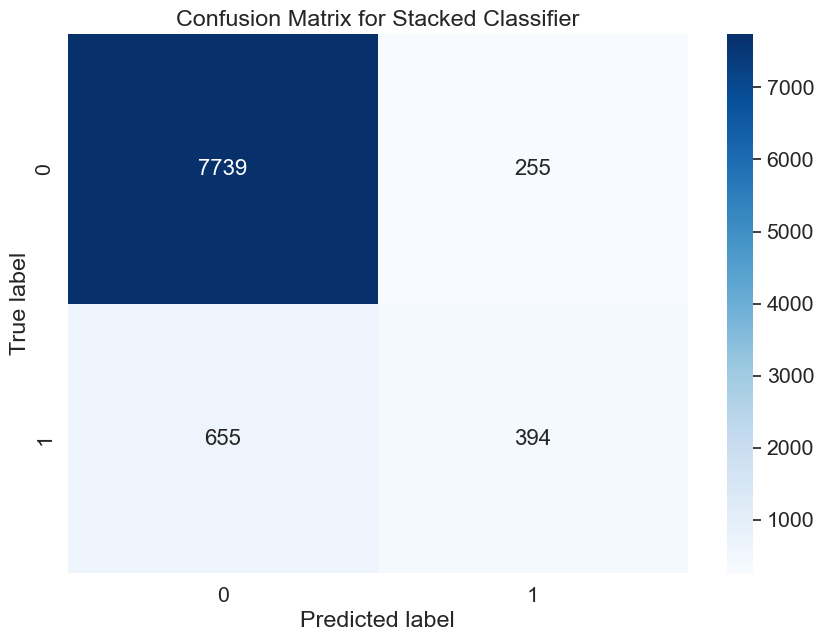

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = loaded_model.predict(X_test_label)

#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#show the cm using seaborn
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g') # annot_kws is for the annotation size
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Stacked Classifier')

file_name = "confusion_matrix_plot_five features.png"
plt.savefig(file_name, dpi=300, bbox_inches='tight')
print(f"Plot saved as {file_name}")

plt.show()
